In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:

!mkdir data1/
!wget https://raw.githubusercontent.com/Keshavkulhari/cl653/main/water_potability.csv
df = pd.read_csv("/content/water_potability.csv");

--2024-04-25 15:35:50--  https://raw.githubusercontent.com/Keshavkulhari/cl653/main/water_potability.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 525187 (513K) [text/plain]
Saving to: ‘water_potability.csv’

water_potability.cs 100%[===================>] 512.88K  --.-KB/s    in 0.1s    

2024-04-25 15:35:50 (3.90 MB/s) - ‘water_potability.csv’ saved [525187/525187]



In [ ]:
df.shape


(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.isna().sum() #checking for missing values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: xlabel='Potability', ylabel='count'>

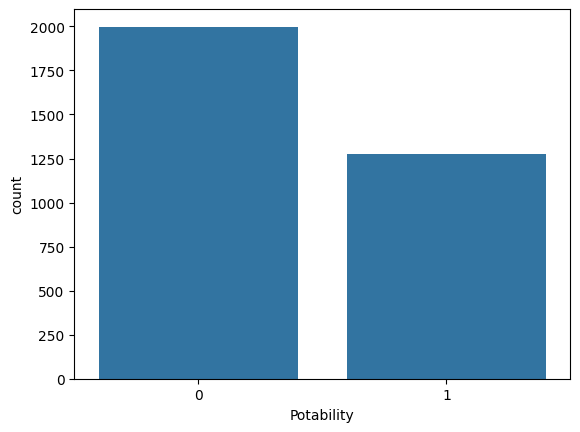

In [ ]:
# Count distribution of target variable
sns.countplot(x=df["Potability"])

<Axes: >

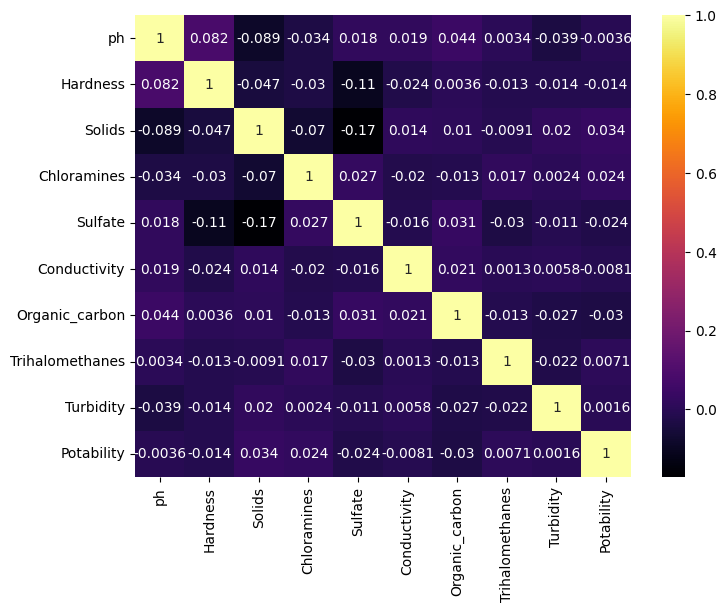

In [ ]:
# Correlation matrix for dataset
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="inferno")


There isn't much correlation between any of the attributes

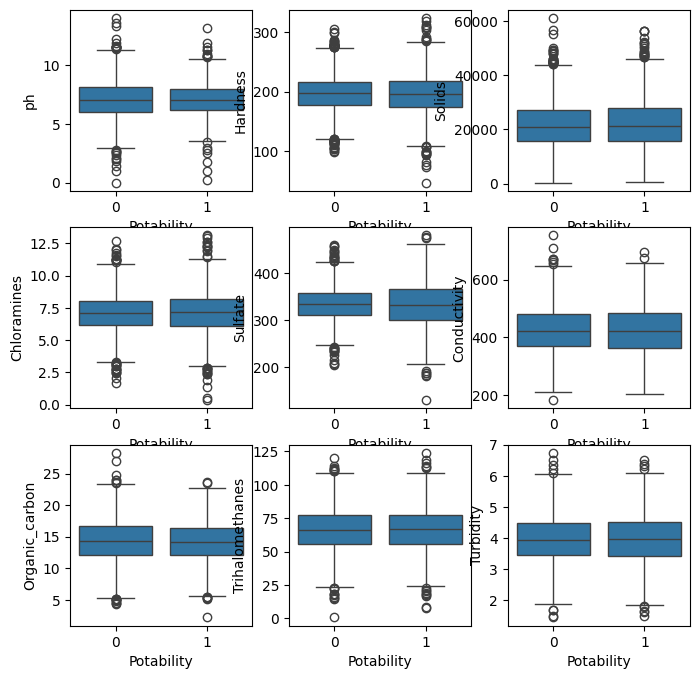

In [ ]:
#Relationship of numerical attributes with potability
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(8, 8))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.boxplot(x=df.Potability, y=df[attributes[k]], ax=axes[i,j])
        k=k+1

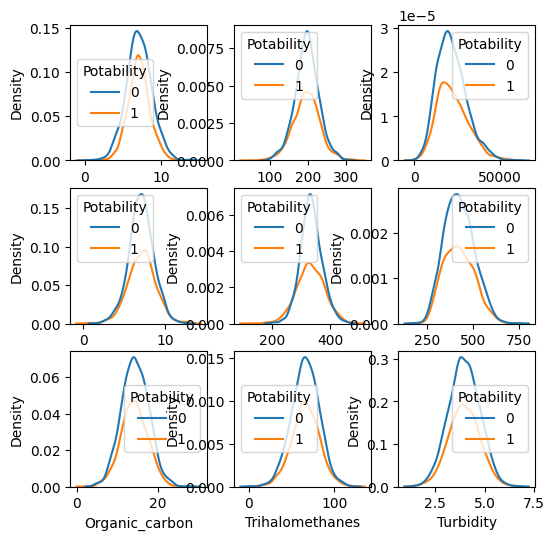

In [ ]:
attributes=[ 'ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']
used_attribute_list=[]
fig, axes = plt.subplots(3,3, figsize=(6, 6))
k=0
for i in [0, 1, 2]:
    for j in [0,1,2]:
        sns.kdeplot(hue=df.Potability, x=df[attributes[k]], ax=axes[i,j])
        k=k+1

All the attributes follow almost the same distribution irrespective of potability.

In [ ]:
#filling the missing values
cond=df['Potability']==0

df['ph'].fillna(cond.map({True:df.loc[df['Potability']==0]['ph'].median(),
                                False:df.loc[df['Potability']==1]['ph'].median()
                                }),inplace=True)

df['Sulfate'].fillna(cond.map({True:df.loc[df['Potability']==0]['Sulfate'].median(),
                                False:df.loc[df['Potability']==1]['Sulfate'].median()
                                }),inplace=True)

df['Trihalomethanes'].fillna(cond.map({True:df.loc[df['Potability']==0]['Trihalomethanes'].median(),
                                False:df.loc[df['Potability']==1]['Trihalomethanes'].median()
                                }),inplace=True)

In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [ ]:
#Min-Max range before scaling
df.describe().T[['min','max']].T

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
min,0.0,47.432,320.942611,0.352,129.000000,181.483754,2.2,0.738,1.450,0.0
max,14.0,323.124,61227.196008,13.127,481.030642,753.342620,28.3,124.000,6.739,1.0


In [ ]:
input_cols = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

In [ ]:
#scaling down all the data points in the range of 0 to 1
scaler = MinMaxScaler()
scaler.fit(df[input_cols])
df[input_cols] = scaler.transform(df[input_cols])
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502533,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0
1,0.265434,0.297400,0.300611,0.491839,0.580601,0.719411,0.497319,0.450999,0.576793,0
2,0.578509,0.641311,0.321619,0.698543,0.580601,0.414652,0.562017,0.532866,0.303637,0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0


In [ ]:
#Min-Max range after scaling
df.describe().T[['min','max']].T

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#Seperating Response Variable from the dataset
X=df.drop('Potability',axis=1)
y=df['Potability']

In [ ]:
X.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

In [ ]:
#train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [ ]:
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "Decision Tree": DecisionTreeClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(43)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=5
                                            ).mean()

    return model_scores

In [ ]:
model_scores = fit_and_score(models,X_train,X_test,y_train,y_test)

model_scores

{'Logistic Regression': 0.6153897950022444,
 'KNN': 0.5872661978153524,
 'Random Forest': 0.7643348795451146,
 'Decision Tree': 0.7045338919646864}

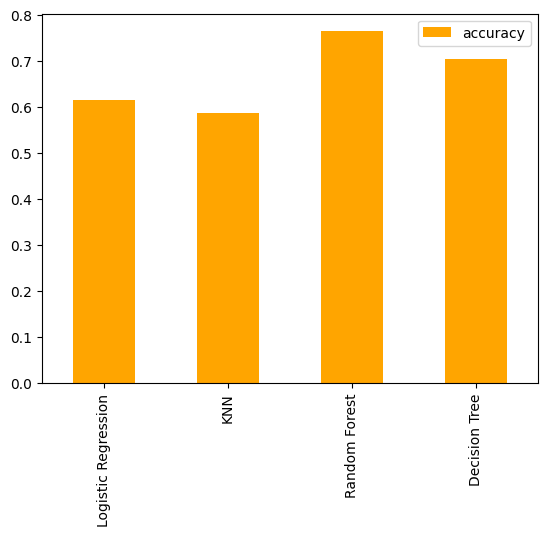

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color="orange");

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<Axes: >

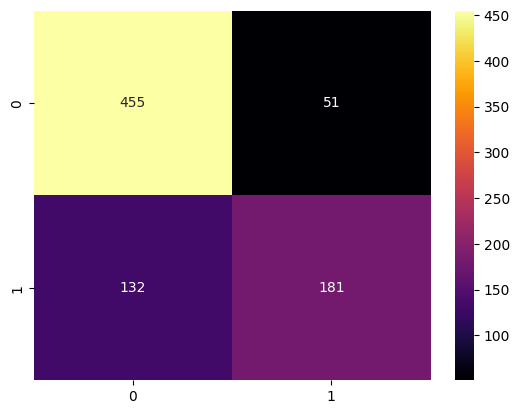

In [ ]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="inferno")

As we can see that the True Positive and True Negative percentages are higher than that of False Positive and False Negative, we can safely that our model makes fair predictions.

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       506
           1       0.78      0.58      0.66       313

    accuracy                           0.78       819
   macro avg       0.78      0.74      0.75       819
weighted avg       0.78      0.78      0.77       819



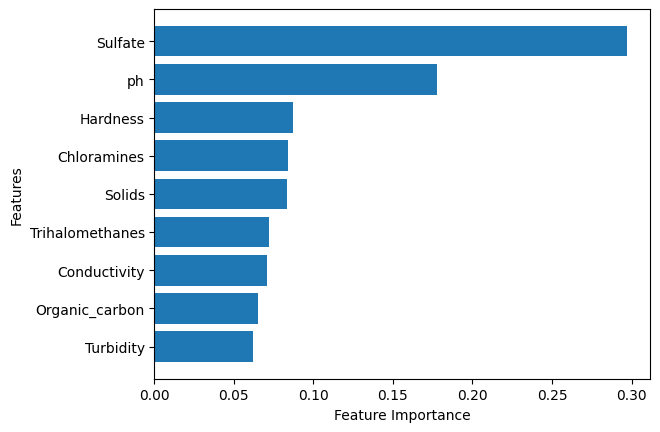

In [ ]:
# Helper function for plotting feature importance
def plot_features(columns, importances,n=20):
    df = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    # Plot dataframe
    fix, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

plot_features(df.drop(['Potability'],axis=1).columns, model.feature_importances_)